# Fraud Detection BCA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('fraud_train.csv')
pd.set_option('display.max_columns', None)
dfTrain.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


# EDA

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [4]:
dfTrain.describe()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.000000,1.312500e+04,1.312500e+04,13125.000000,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.0,13125.0,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,7507.821943,2.457490e+06,2.457541e+06,85.340114,39300.900876,1678.483886,1.649037e+06,178.778362,10.729524,1.315219e+06,96.057981,5.019581,148.295543,3947.520457,766.033448,138895.669638,2.854857,1.932267,1.404267,8.237410,3.0,999.0,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,4326.959832,1.047995e+02,1.088401e+02,40.921347,124187.745686,361.236161,9.914309e+05,142.504458,3.891783,2.838050e+06,3.566912,0.417351,70.112724,2405.917886,466.132889,47872.569599,0.825276,0.251297,1.013583,1.721997,0.0,0.0,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,-2.000000,1.000000,1.000000,2.000000,1.000000,47.000000,1.000000,1.000000,1.000000,3.000000,3.0,999.0,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3784.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,96.000000,5.000000,102.000000,1914.000000,613.000000,102622.000000,2.000000,2.000000,1.000000,9.000000,3.0,999.0,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7475.000000,2.457500e+06,2.457543e+06,103.000000,-2.000000,1798.000000,1.836319e+06,156.000000,10.000000,5.700000e+05,96.000000,5.000000,128.000000,3720.000000,613.000000,140707.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,11265.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.419350e+06,301.000000,11.000000,1.250000e+06,96.000000,5.000000,203.000000,5637.000000,613.000000,175420.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,216.000000,16.000000,293.000000,8697.000000,2688.000000,235914.000000,4.000000,2.000000,5.000000,9.000000,3.0,999.0,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


In [5]:
dfTrain.dropna(inplace=True)

In [6]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13124
Data columns (total 28 columns):
X                             13104 non-null int64
id_tanggal_transaksi_awal     13104 non-null int64
tanggal_transaksi_awal        13104 non-null int64
tipe_kartu                    13104 non-null int64
id_merchant                   13104 non-null int64
nama_merchant                 13104 non-null int64
tipe_mesin                    13104 non-null int64
tipe_transaksi                13104 non-null int64
nama_transaksi                13104 non-null int64
nilai_transaksi               13104 non-null float64
id_negara                     13104 non-null int64
nama_negara                   13104 non-null int64
nama_kota                     13104 non-null int64
lokasi_mesin                  13104 non-null int64
pemilik_mesin                 13104 non-null int64
waktu_transaksi               13104 non-null int64
kuartal_transaksi             13104 non-null int64
kepemilikan_kartu     

In [7]:
listItem = []
for col in dfTrain.columns :
    listItem.append([col, dfTrain[col].dtype, dfTrain[col].isna().sum(), round((dfTrain[col].isna().sum()/len(dfTrain[col])) * 100,2),
                    dfTrain[col].nunique(), list(dfTrain[col].sample(5).drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,X,int64,0,0.0,8780,"[10738, 6122, 10981, 2959, 7462]"
1,id_tanggal_transaksi_awal,int64,0,0.0,360,"[2457432, 2457404, 2457445, 2457583, 2457652]"
2,tanggal_transaksi_awal,int64,0,0.0,452,"[2457400, 2457547, 2457597, 2457708, 2457447]"
3,tipe_kartu,int64,0,0.0,14,"[93, 111, 0, 104]"
4,id_merchant,int64,0,0.0,1121,"[552190, -2, 52495]"
5,nama_merchant,int64,0,0.0,1105,"[1680, 1798, 429]"
6,tipe_mesin,int64,0,0.0,5338,"[1167876, 2787947, 1404813, 16686, 1204210]"
7,tipe_transaksi,int64,0,0.0,20,"[26, 159]"
8,nama_transaksi,int64,0,0.0,20,"[10, 19, 11, 9]"
9,nilai_transaksi,float64,0,0.0,1423,"[5000000.0, 1500000.0, 2500000.0, 300000.0, 50..."


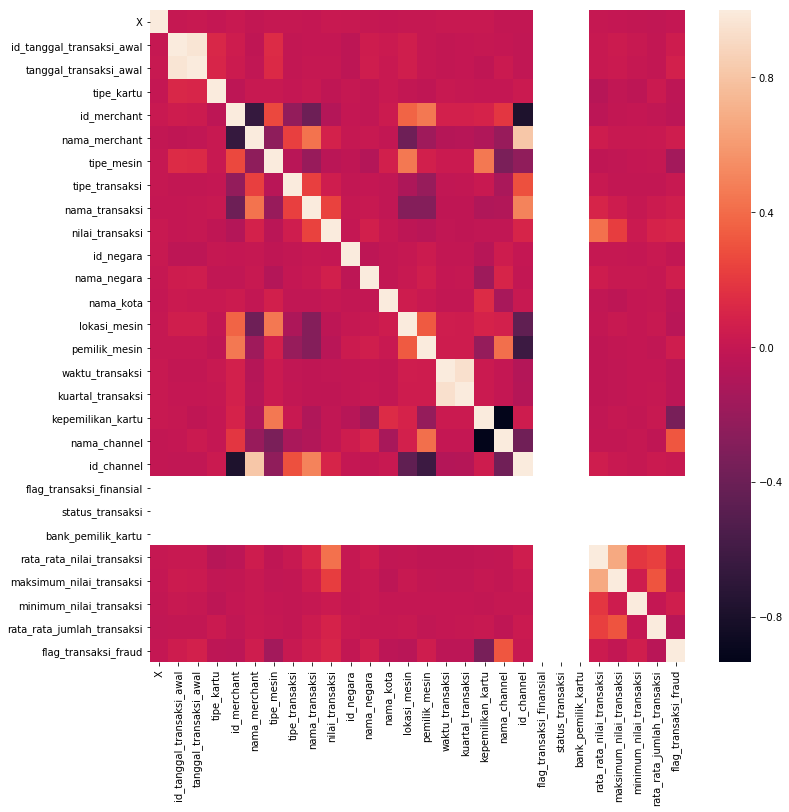

In [8]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(dfTrain.corr())

In [9]:
dfTrain['flag_transaksi_fraud'].value_counts()

0    12210
1      894
Name: flag_transaksi_fraud, dtype: int64

In [10]:
# dfTrain['len_waktu_trx'] = dfTrain['waktu_transaksi'].apply(lambda x: len(str(x)))
# dfTrain = dfTrain[dfTrain['len_waktu_trx'] > 4]
# len(dfTrain)

# Feature Engineering

In [11]:
data = dfTrain.drop(['flag_transaksi_fraud', 'flag_transaksi_finansial',
                    'X', 'bank_pemilik_kartu', 'status_transaksi', 
                     'nama_negara', 'kuartal_transaksi', 'tipe_kartu',
                    'id_negara', 'tipe_transaksi', 'nama_transaksi', 'kepemilikan_kartu',
                    'id_merchant','pemilik_mesin', 'id_channel'], axis=1)
target = dfTrain['flag_transaksi_fraud']

In [12]:
# namachannel = pd.get_dummies(data['nama_channel'])
# data.drop(['nama_channel'],axis=1,inplace=True)
# data = pd.concat([data,namachannel],axis=1)
# data.head()

In [13]:
data['range'] = data['maksimum_nilai_transaksi'] - data['minimum_nilai_transaksi']
data['datediff'] = data['tanggal_transaksi_awal'] - data['id_tanggal_transaksi_awal']
data['trx_ratio_to_maximum'] = data['nilai_transaksi'] / data['maksimum_nilai_transaksi']

In [14]:
data.describe()

,id_tanggal_transaksi_awal,tanggal_transaksi_awal,nama_merchant,tipe_mesin,nilai_transaksi,nama_kota,lokasi_mesin,waktu_transaksi,nama_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,range,datediff,trx_ratio_to_maximum
count,1.310400e+04,1.310400e+04,13104.000000,1.310400e+04,1.310400e+04,13104.000000,13104.000000,13104.000000,13104.000000,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,1.310400e+04,13104.000000,1.310400e+04
mean,2.457490e+06,2.457541e+06,1678.309447,1.649208e+06,1.314923e+06,148.330357,3946.856456,138906.249161,1.403922,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,1.221108e+07,50.682463,2.165203e-01
std,1.048163e+02,1.088619e+02,361.494170,9.911708e+05,2.837644e+06,70.117428,2405.196327,47886.743124,1.012817,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,1.644219e+07,27.968612,4.368901e-01
min,2.457297e+06,2.457303e+06,2.000000,-4.000000e+00,1.000000e+00,1.000000,2.000000,47.000000,1.000000,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,-1.500000e+06,-9.000000,3.703704e-07
25%,2.457404e+06,2.457451e+06,1798.000000,1.130703e+06,2.000000e+05,102.000000,1913.750000,102622.000000,1.000000,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,2.470550e+06,27.000000,3.333333e-02
50%,2.457500e+06,2.457543e+06,1798.000000,1.836319e+06,5.725750e+05,128.000000,3720.500000,140707.000000,1.000000,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,5.973500e+06,52.000000,9.877910e-02
75%,2.457581e+06,2.457632e+06,1798.000000,2.419356e+06,1.251524e+06,203.000000,5636.000000,175431.500000,1.000000,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,1.486038e+07,76.000000,2.500000e-01
max,2.457662e+06,2.457754e+06,1859.000000,6.928943e+06,7.500000e+07,293.000000,8697.000000,235914.000000,5.000000,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,9.998000e+07,107.000000,1.315789e+01


C:\Users\harto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\harto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\harto\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


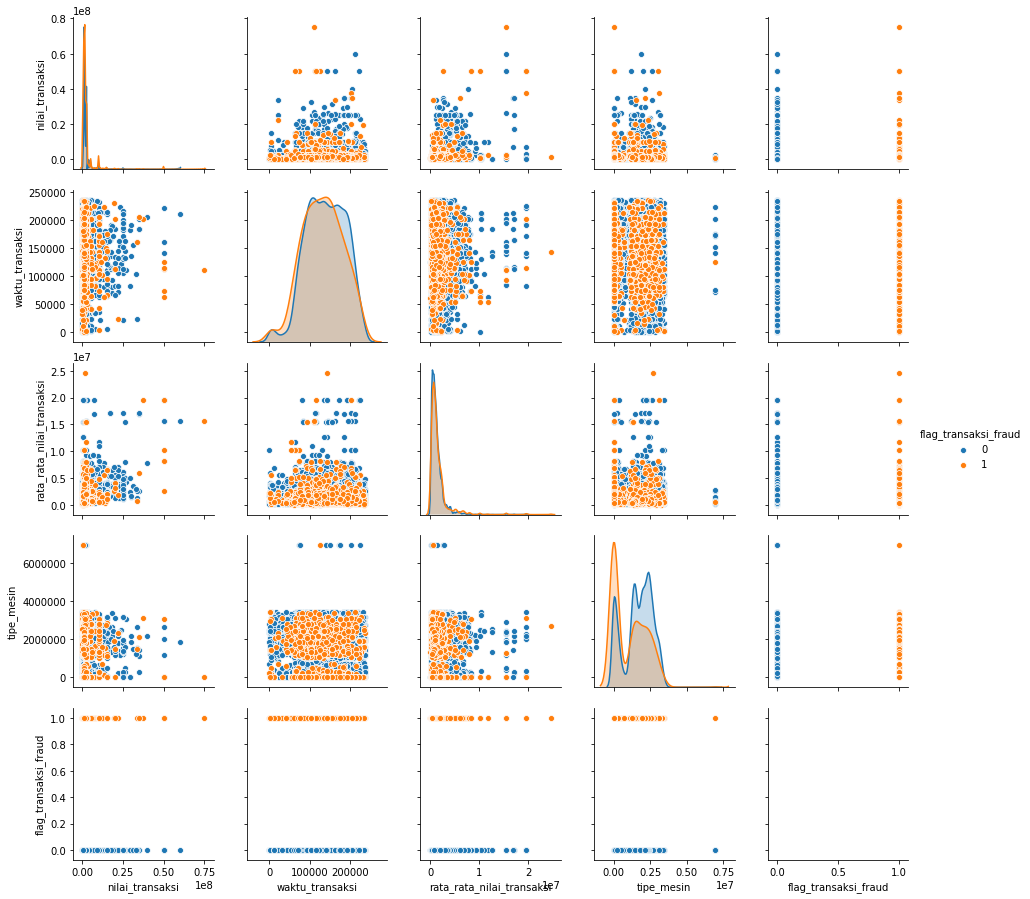

In [15]:
sns.pairplot(pd.concat([data[['nilai_transaksi','waktu_transaksi','rata_rata_nilai_transaksi'
                             ,'tipe_mesin']],target], axis=1), hue='flag_transaksi_fraud')

# Clamp Transformation

In [16]:
# def clampTrans(item, bMax, bMin) :
#     if(item > bMax) :
#         return bMax
#     elif(item < bMin) :
#         return bMin
#     return item

# for col in ['waktu_transaksi', 'nilai_transaksi', 'rata_rata_nilai_transaksi'] :
#     batasMax = data[col].mean() + (2 * data[col].std())
#     batasMin = data[col].mean() - (2 * data[col].std())
#     print(batasMax)
#     print(batasMin)
#     data[col] = data[col].apply(clampTrans, args=(batasMax,batasMin))

In [17]:
# sns.pairplot(pd.concat([data[['nilai_transaksi','waktu_transaksi','rata_rata_nilai_transaksi'
#                              ,'tipe_mesin']],target], axis=1), hue='flag_transaksi_fraud')

# Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();

scaler.fit(data[data.columns[:13]])
scaled_features = scaler.transform(data[data.columns[:13]])

C:\Users\harto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
dataScaled = pd.DataFrame(scaled_features,columns=data.columns[:13])
data.drop(data.columns[:13], axis=1, inplace=True)
data = pd.concat([dataScaled, data.reset_index(drop=True)],axis=1)
data.head()

,id_tanggal_transaksi_awal,tanggal_transaksi_awal,nama_merchant,tipe_mesin,nilai_transaksi,nama_kota,lokasi_mesin,waktu_transaksi,nama_channel,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,range,datediff,trx_ratio_to_maximum
0,0.956164,0.937916,0.967151,3.759779e-01,0.029333,0.904110,0.475561,0.822107,0.00,0.052090,0.097157,0.000133,0.092119,9740000.0,80,0.225641
1,0.334247,0.452328,0.967151,1.443221e-07,0.033333,0.410959,0.145141,0.309891,1.00,0.053584,0.099658,0.000400,0.070820,9970000.0,88,0.250000
2,0.613699,0.685144,0.967151,1.443221e-07,0.016000,0.342466,0.147326,0.594271,1.00,0.628577,1.000000,0.000557,0.074547,99958196.0,91,0.012000
3,0.991781,0.982262,0.133010,4.049934e-01,0.004267,0.815068,0.810466,0.657447,0.25,0.026883,0.068490,0.000133,0.052183,6874408.0,87,0.046482
4,0.038356,0.181818,0.967151,3.369828e-01,0.002000,0.232877,0.393675,0.607512,0.00,0.023073,0.024629,0.001333,0.024494,2400000.0,74,0.060000


# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target,
                                                    test_size=0.30, random_state=101)

# Gradient Boosting Testing

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, matthews_corrcoef, roc_auc_score, confusion_matrix, accuracy_score, log_loss

In [22]:
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc = XGBClassifier()

In [23]:
gbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
predict = gbc.predict(X_test)
predictProb = gbc.predict_proba(X_test)
print(len(predictProb))
predictProb

3932


array([[0.9900506 , 0.00994937],
       [0.9159703 , 0.08402969],
       [0.86607397, 0.13392605],
       ...,
       [0.9566117 , 0.04338833],
       [0.9253437 , 0.07465629],
       [0.97774935, 0.02225064]], dtype=float32)

In [25]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print(matthews_corrcoef(y_test, predict))
print(roc_auc_score(y_test, predictProb[:,1]))

[[3635   26]
 [ 198   73]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3661
           1       0.74      0.27      0.39       271

   micro avg       0.94      0.94      0.94      3932
   macro avg       0.84      0.63      0.68      3932
weighted avg       0.93      0.94      0.93      3932

0.4240796754205334
0.8922874096263498


# Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [27]:
ros = RandomOverSampler(random_state=101)
# ros = SMOTE(random_state=101)

X_ros, y_ros = ros.fit_sample(X_train, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train.columns)

In [28]:
y_train.value_counts()

0    8549
1     623
Name: flag_transaksi_fraud, dtype: int64

In [29]:
pd.Series(y_ros).value_counts()

1    8549
0    8549
dtype: int64

In [30]:
# gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc = XGBClassifier()
gbc.fit(X_ros, y_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
predict = gbc.predict(X_train)
predictProb = gbc.predict_proba(X_train)
print(len(predictProb))
predictProb

9172


array([[0.64826727, 0.3517327 ],
       [0.58997774, 0.4100223 ],
       [0.87603164, 0.12396838],
       ...,
       [0.8434535 , 0.1565465 ],
       [0.6428025 , 0.35719752],
       [0.12780422, 0.8721958 ]], dtype=float32)

In [32]:
print(confusion_matrix(y_train, predict))
print(classification_report(y_train, predict))
print(matthews_corrcoef(y_train, predict))
print(roc_auc_score(y_train, predictProb[:,1]))

[[7359 1190]
 [  95  528]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8549
           1       0.31      0.85      0.45       623

   micro avg       0.86      0.86      0.86      9172
   macro avg       0.65      0.85      0.69      9172
weighted avg       0.94      0.86      0.89      9172

0.4567951907061953
0.9317709992833307


In [33]:
X_train.columns

Index(['id_tanggal_transaksi_awal', 'tanggal_transaksi_awal', 'nama_merchant',
       'tipe_mesin', 'nilai_transaksi', 'nama_kota', 'lokasi_mesin',
       'waktu_transaksi', 'nama_channel', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'range', 'datediff',
       'trx_ratio_to_maximum'],
      dtype='object')

In [34]:
X_ros.columns

Index(['id_tanggal_transaksi_awal', 'tanggal_transaksi_awal', 'nama_merchant',
       'tipe_mesin', 'nilai_transaksi', 'nama_kota', 'lokasi_mesin',
       'waktu_transaksi', 'nama_channel', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'range', 'datediff',
       'trx_ratio_to_maximum'],
      dtype='object')

In [35]:
X_test.columns

Index(['id_tanggal_transaksi_awal', 'tanggal_transaksi_awal', 'nama_merchant',
       'tipe_mesin', 'nilai_transaksi', 'nama_kota', 'lokasi_mesin',
       'waktu_transaksi', 'nama_channel', 'rata_rata_nilai_transaksi',
       'maksimum_nilai_transaksi', 'minimum_nilai_transaksi',
       'rata_rata_jumlah_transaksi', 'range', 'datediff',
       'trx_ratio_to_maximum'],
      dtype='object')

In [36]:
predict = gbc.predict(X_test)
predictProb = gbc.predict_proba(X_test)
print(len(predictProb))
predictProb

3932


array([[0.9247535 , 0.07524649],
       [0.5759059 , 0.42409408],
       [0.43248242, 0.5675176 ],
       ...,
       [0.6222745 , 0.3777255 ],
       [0.39353895, 0.60646105],
       [0.8240709 , 0.17592914]], dtype=float32)

In [37]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print(matthews_corrcoef(y_test, predict))
print(roc_auc_score(y_test, predictProb[:,1]))
# print(log_loss(y_test,predictProb[:,1]))
print(accuracy_score(y_test,predict))

[[3137  524]
 [  66  205]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3661
           1       0.28      0.76      0.41       271

   micro avg       0.85      0.85      0.85      3932
   macro avg       0.63      0.81      0.66      3932
weighted avg       0.93      0.85      0.88      3932

0.3997924174254073
0.8856280067853942
0.8499491353001017


# Features Importance

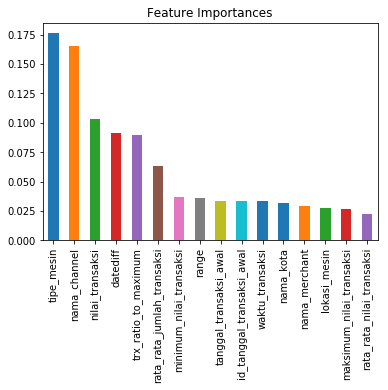

In [38]:
coef1 = pd.Series(gbc.feature_importances_, data.columns).sort_values(ascending = False)
coef1.plot(kind='bar', title='Feature Importances')